<a href="https://colab.research.google.com/github/nikita1128/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement:**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

#**Importing the required libraries**

In [19]:
#Importing the required libraries

#For data loading and numerical operations
import pandas as pd
import numpy as np

#For data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For converting categorical variable into numerical
from sklearn.preprocessing import LabelEncoder

#remove warnings
import warnings
warnings.filterwarnings("ignore")


# **Loading the data file**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#loading the data file using read_csv()
cardio_df = pd.read_csv("/content/drive/MyDrive/Alma/Pro/Capstone Project/Copy of data_cardiovascular_risk.csv")

# **Exploratory Data Analysis**

In [22]:
#Displays the first five rows of the dataset
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [23]:
#Displays the last five rows of the dataset
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [24]:
#shape of the dataset
cardio_df.shape

(3390, 17)

In [25]:
#Printing the rows and columns of a dataset
print ("Rows    : " ,cardio_df.shape[0])
print ("Columns : " ,cardio_df.shape[1])

Rows    :  3390
Columns :  17


In [26]:
#Printing the list of columns(features) in dataframe
print("Features: \n" ,cardio_df.columns.tolist())

Features: 
 ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [27]:
#getting information about the dataset using info() method
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#**Variable Breakdown**

**id:**	Patient identification number

####***Demographic:***

**age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**education:** no further information provided

**sex:** male or female(Nominal)

####***Behavioral:***

**is_smoking:** whether or not the patient is a current smoker (Nominal)

**cigsPerDay:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

####***Information on medical history:***

**BPMeds:** whether or not the patient was on blood pressure medication (Nominal)

**prevalentStroke:** whether or not the patient had previously had a stroke (Nominal)

**prevalentHyp:** whether or not the patient was hypertensive (Nominal)

**diabetes:** whether or not the patient had diabetes (Nominal)

####***Information on current medical condition:***

**totChol:** total cholesterol level (Continuous)

**sysBP:** systolic blood pressure (Continuous)

**diaBP:** diastolic blood pressure (Continuous)

**BMI:** Body Mass Index (Continuous)

**heartRate :** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

**glucose:** glucose level (Continuous)

####***Target variable to predict:***

**TenYearCHD:** 10 year risk of coronary heart disease (CHD),binary variable where “1” means Yes and “0” means No.

#**Handling missing values**

In [28]:
#checking null values
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [29]:
#Printing number of null(missing) values
print("Missing values :  ", cardio_df.isnull().sum().values.sum())

Missing values :   510


In [30]:
#calculating the missing percentage of features in the dataset
percent_missing = (cardio_df.isnull().sum()/len(cardio_df)) * 100 
percent_missing.round(2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

Inference:

From above we can see that there are 510 null/missing value in our dataframe. Numer of null/missing values with their respective percentages are as follows: 

*   education : 87 with 2.57%
*   cigsPerDay : 22 with 0.65%
*   BPMeds : 44 with 1.3%
*   totChol : 38 with 1.12%
*   BMI : 14 with 0.41%
*   heartRate : 1 with 0.03%
*   glucose : 304 with 8.97%

As the missing percentages are low, we will be dropping null values from these columns except 'glucose' column.

In [31]:
#checking duplicate values
cardio_df.duplicated().sum()

0

#### From above we can see that there are no duplicate values in our dataset.

In [32]:
#Replacing the null/missing values of "glucose" column with the mode of the data to reduce the number of null/missing values.
cardio_df["glucose"].fillna(cardio_df["glucose"].mode()[0], inplace = True)

In [33]:
#Making copy of original dataset to do further analysis
cardio_data = cardio_df.copy()

#Dropping irrelevant columns
cardio_data.drop(["id", "education"], axis = 1, inplace = True)

#Dropping all other rows having null/missing values
cardio_data.dropna(inplace = True)
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   sex              3272 non-null   object 
 2   is_smoking       3272 non-null   object 
 3   cigsPerDay       3272 non-null   float64
 4   BPMeds           3272 non-null   float64
 5   prevalentStroke  3272 non-null   int64  
 6   prevalentHyp     3272 non-null   int64  
 7   diabetes         3272 non-null   int64  
 8   totChol          3272 non-null   float64
 9   sysBP            3272 non-null   float64
 10  diaBP            3272 non-null   float64
 11  BMI              3272 non-null   float64
 12  heartRate        3272 non-null   float64
 13  glucose          3272 non-null   float64
 14  TenYearCHD       3272 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 409.0+ KB


In [34]:
#Checking for the unique values in each column
print("Unique values :\n",cardio_data.nunique())

Unique values :
 age                  39
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             236
sysBP               224
diaBP               141
BMI                1242
heartRate            68
glucose             130
TenYearCHD            2
dtype: int64


In [35]:
#Printing unique values
for col in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']:
    print(f"Unique values in {col} column: ", cardio_data[col].unique())

Unique values in sex column:  ['M' 'F']
Unique values in is_smoking column:  ['NO' 'YES']
Unique values in BPMeds column:  [0. 1.]
Unique values in prevalentStroke column:  [0 1]
Unique values in prevalentHyp column:  [1 0]
Unique values in diabetes column:  [0 1]
Unique values in TenYearCHD column:  [0 1]


###**Converting categorical variables into numerical values using Label Encoder**

In [36]:
#label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()

#Assiging categorical variables
cat_col = ['sex','is_smoking']

#Converting categorical variables into numerical
cardio_data[cat_col] = cardio_data[cat_col].apply(label_encoder.fit_transform)
cardio_data.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


#**Descriptive Statistics**

In [37]:
#Using describe() function to generate descriptive statistics of the data
cardio_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3272.0,49.442237,8.559199,32.00,42.00,49.00,56.000,70.0
sex,3272.0,0.438570,0.496288,0.00,0.00,0.00,1.000,1.0
is_smoking,3272.0,0.493276,0.500031,0.00,0.00,0.00,1.000,1.0
cigsPerDay,3272.0,9.054095,11.866441,0.00,0.00,0.00,20.000,70.0
BPMeds,3272.0,0.029645,0.169633,0.00,0.00,0.00,0.000,1.0
prevalentStroke,3272.0,0.005807,0.075993,0.00,0.00,0.00,0.000,1.0
prevalentHyp,3272.0,0.313264,0.463892,0.00,0.00,0.00,1.000,1.0
diabetes,3272.0,0.025672,0.158180,0.00,0.00,0.00,0.000,1.0
totChol,3272.0,237.036675,45.114324,113.00,206.00,234.00,264.000,696.0
sysBP,3272.0,132.409077,22.123491,83.50,117.00,128.00,143.625,295.0


Inference:

1. As the categorical data of the dataset were already converted into discrete numerical values therefore they are also included in descriptive statistics.
2. Age of the patients in this dataset ranges from 32 to 70.
3. Only 25% of patients in the given dataset are consuming cigarettes on an average of at least 20 cigarettes per day.
4. The average total cholesterol level of the patients in this dataset is 237.03.
5. The minimum and maximum systolic blood pressure of the patients are 83.5 and 295, respectively.
6. The minimum and maximum diastolic blood pressure of the patients are 48 and 142.5, respectively.
7. The minimum and maximum body mass index of the patients are 15.96 and 56.8, respectively.
8. The average heart rate of the patients in this dataset is 75.95.
9. The average glucose level of the patients in this dataset is 81.42.


# **Checking the 10-year risk of coronary heart disease (CHD)**

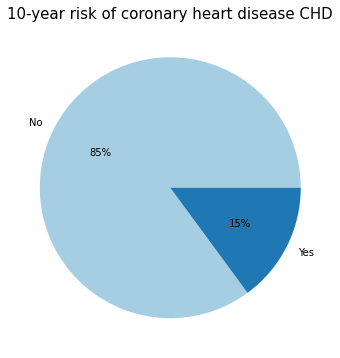

In [38]:
#setting figure size
fig = plt.figure(figsize=(6,6))

#defining Seaborn color palette
colors = sns.color_palette('Paired')

#Creating labels for the pie chart
labels = "No", "Yes"

#create pie chart
plt.pie(cardio_data['TenYearCHD'].value_counts(), labels = labels, colors = colors, autopct='%.0f%%')

#To display title of the pie chart
plt.title("10-year risk of coronary heart disease CHD", fontsize= 15)
plt.show()

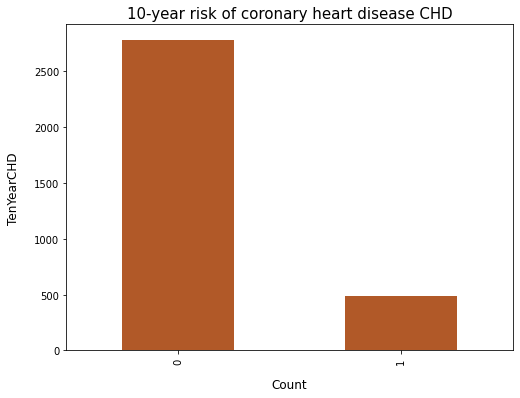

In [39]:
#Bar chart to display target variable
cardio_data['TenYearCHD'].value_counts().plot(kind='bar', colormap = 'Paired_r', figsize=(8, 6))

#To display the x label, y label and title of the bar chart
plt.xlabel("Count", labelpad=14, fontsize = 12)
plt.ylabel("TenYearCHD", labelpad=14, fontsize = 12)
plt.title("10-year risk of coronary heart disease CHD", fontsize = 15)
plt.show()

In [40]:
#Checking the value count of our target variable
cardio_data['TenYearCHD'].value_counts()

0    2784
1     488
Name: TenYearCHD, dtype: int64

Inference:

1. From above observation, we can conclude that our dataset is not balanced i.e. Yes is 488 (~15%) and No is 2784 ( ~86%). 
2. So we will analyze the data with other features while taking the target values separately to get some insights.
3. Analysis shows that ten year risk of coronary heart disease(CHD) of patients in the given dataset is 15% where the number of negative cases outweighs the number of positive cases leading to a class imbalance problem while fitting our models.Therefore, this problem needs to be addressed and taken care of.

#**10-year risk of CHD according to categorical variables**

In [41]:
#creating the list of categorical variables for visualization
cat_variables = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

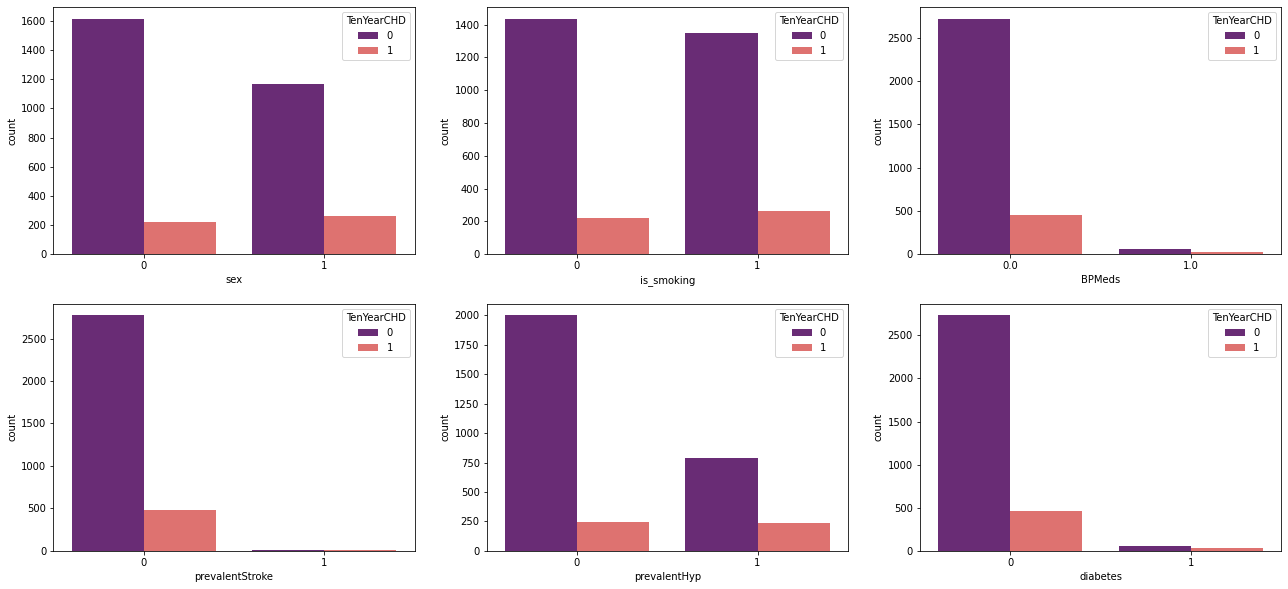

In [42]:
#setting up the visualization for plotting categorical variables
row, col = 2, 3
f, ax = plt.subplots(row, col, figsize = (22, 10))

#count plot to display target variable according to categorical variables
for i, var in enumerate(cat_variables):
    row = i//col
    pos = i % col 
    viz = sns.countplot(data = cardio_data, x = var, hue = 'TenYearCHD', palette = "magma", ax = ax[row][pos])

plt.show()

Inference:
1. From above count plots, we can observe that BPmeds, prevalentStroke and diabetes are highly imbalanced.
2. The number of females not affected by CHD is more than the number of males.
3. The number of current smokers and non-smokers is almost the same.
4. Non-hypertensive patients not affected by CHD are more than hypertensive patients.

According to my hypothesis:
1. Female patients are less prone to the 10-year risk of future coronary heart disease (CHD).
2. Patients taking blood pressure medication are having low risk of CHD as compared to those who are not taking medication.